Install the packages in the R 4.0 environment.

In [22]:
# if (!requireNamespace("BiocManager", quietly = TRUE))
#     install.packages("BiocManager")

# BiocManager::install("SingleCellExperiment")
# BiocManager::install("scmap")

Load packages.

In [23]:
library("SingleCellExperiment")
library("scmap")

Build reference.

In [3]:
# load reference dataset
ref_dir <- "/stor/public/hcad/heart_heart_HCLAdultHeart1/heart_heart_HCLAdultHeart1.seuratobj.rds"
seurat.obj <- readRDS(ref_dir)
seurat.obj

An object of class Seurat 
21005 features across 1308 samples within 1 assay 
Active assay: RNA (21005 features, 2000 variable features)
 2 dimensional reductions calculated: pca, umap

In [4]:
# scmap needs a ref with SingleCellExperiment data structure.
# In the SingleCellExperiment structure, there are normcounts and logcounts in hpca.se@assays@data
# celltype1 in hpca.se@colData, feature_symbol in hpca.se@rowData

In [5]:
# in the demo data, there is not raw counts, so I recover it.
counts.mat <- as.matrix(seurat.obj@assays$RNA@counts)
logcounts.mat <- log2(counts.mat + 1)

sce <- SingleCellExperiment(assays = list(counts = counts.mat,logcounts = logcounts.mat))
# sce <- SingleCellExperiment(assays = list(logcounts = logcounts.mat))
sce@colData$cell_type1 <- seurat.obj@meta.data$cell_cluster
rowData(sce)$feature_symbol <- rownames(sce)
sce

class: SingleCellExperiment 
dim: 21005 1308 
metadata(0):
assays(2): counts logcounts
rownames(21005): A1BG-AS1 A2M ... bP-2189O9.2 hsa-mir-548d-1
rowData names(1): feature_symbol
colnames(1308): AdultHeart_1.AAAACGAAAACGTAGAGA
  AdultHeart_1.AAAACGTTCCGCCCATCT ... AdultHeart_1.TTGGACCCGCTACGTGGC
  AdultHeart_1.TTGGACTCGTAATAGAGA
colData names(1): cell_type1
reducedDimNames(0):
altExpNames(0):

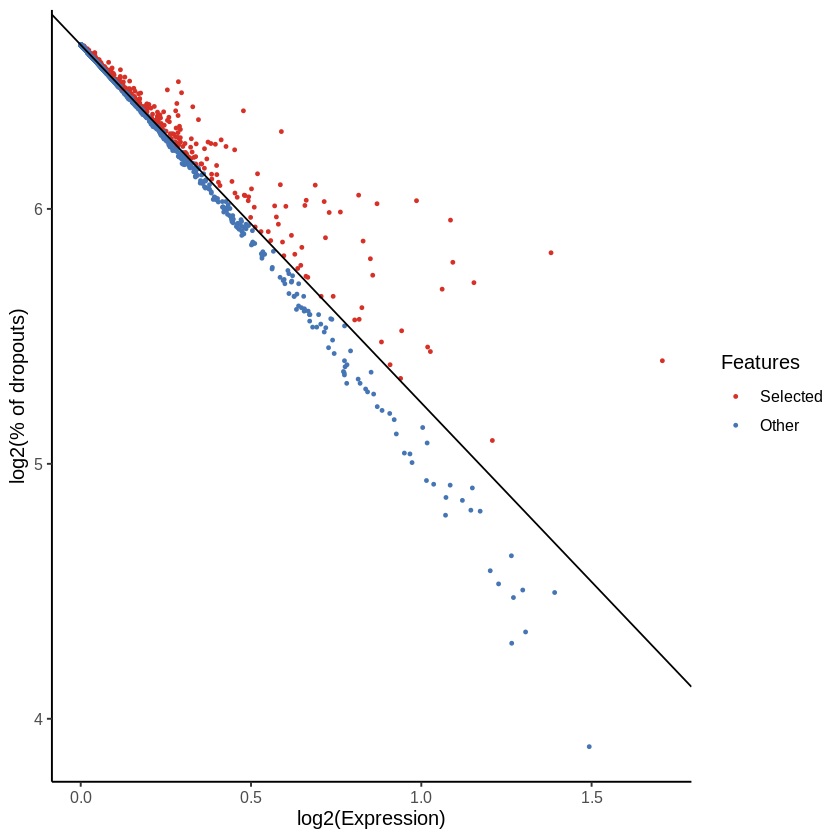

In [6]:
sce <- selectFeatures(sce, suppress_plot = FALSE)
sce <- indexCluster(sce)

Load query data.

In [18]:
query_dir <- "/stor/public/hcad/heart_heart_HCLAdultHeart2/heart_heart_HCLAdultHeart2.seuratobj.rds"
query_data <- readRDS(query_dir)
query_data <- query_data@assays$RNA@counts

In [19]:
# run projection
logcounts.mat <- log2(query_data + 1)

# the query_obj needs counts, logcounts and feature_symbol
query_obj <- SingleCellExperiment(assays=list(counts=query_data, logcounts=logcounts.mat))
rowData(query_obj)$feature_symbol <- rownames(query_obj)

scmapCluster_results <- scmapCluster(
  projection = query_obj, 
  index_list = list(
    ref = metadata(sce)$scmap_cluster_index
  )
)

Warning message in setFeatures(projection, rownames(index)):
"Features CLLU1OS, IGHGP, IGHV1-69-2, IGKV3-20, IGLV1-51, RP11-563K23.1 are not present in the 'SCESet' object and therefore were not set."


In [20]:
# write out the result
query_result <- data.frame(main_type=scmapCluster_results$scmap_cluster_labs)
save_anno_dir <- "" # use your dir
write.csv(query_result, paste0(save_anno_dir, "anno.csv"))